In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../CollegeRookieStatLog.csv")
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.2,0.7,1.0,3.2,-5.93,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,1.2,1.9,3.3,14.6,0.74,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.3,0.9,2.4,2.9,-7.38,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.2,2.9,1.4,5.2,-7.20,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9


In [3]:
end_df = pd.read_csv("../2019DraftClass.csv")
end_df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,Bryce Aiken,Harvard,58,34,29.4,5.0,12.4,0.406,2.9,6.1,...,0.4,2.1,2.4,2.8,0.8,0.0,2.8,1.9,16.8,-1.09
1,Nickeil Alexander-Walker,Virginia Tech,67,67,29.9,4.7,10.1,0.464,3.0,5.6,...,0.6,3.4,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
2,Al-Wajid Aminu,North Florida,34,26,26.0,3.6,6.7,0.542,3.4,5.9,...,2.6,3.8,6.5,0.7,0.4,1.1,2.1,3.6,9.1,-1.65
3,Desmond Bane,TCU,109,82,28.7,4.2,8.2,0.516,2.8,4.8,...,0.8,3.4,4.2,1.9,0.8,0.3,1.3,2.2,11.5,10.08
4,RJ Barrett,Duke,38,38,35.3,8.4,18.5,0.454,6.5,12.2,...,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97


In [5]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
for col in cols_at_end:
    end_df[col] = 0
print(len(df))
print(len(end_df))
df1 = df.append(end_df, ignore_index=True)
df1.head()

866
117


,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.2,0.7,1.0,3.2,-5.93,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,1.2,1.9,3.3,14.6,0.74,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.3,0.9,2.4,2.9,-7.38,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.2,2.9,1.4,5.2,-7.20,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9


In [15]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
for col in cols_at_end:
    end_df[col] = 0
print(len(df))
print(len(end_df))
df1 = df.append(end_df)[end_df.columns]
df1.shape

866
117


(983, 32)

In [6]:
positions = df.Pos.unique()
po_dict = dict(zip(positions, range(len(positions))))
df1 = df.replace({'Pos': po_dict})
df1.head()

AttributeError: 'DataFrame' object has no attribute 'Pos'

In [7]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,0.2,...,0.2,0.7,1.0,3.2,-5.93,0.4,0.3,0.2,0.2,1.3
Ashraf Amaya,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,0.1,...,1.2,1.9,3.3,14.6,0.74,5.6,0.6,0.4,0.2,6.3
James Cotton,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,0.0,...,0.3,0.9,2.4,2.9,-7.38,0.7,0.0,0.1,0.1,2.7
Eddie Robinson,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,0.3,...,0.2,2.9,1.4,5.2,-7.20,2.7,0.5,0.7,0.4,7.0
Gilbert Arenas,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,1.5,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9


In [8]:
df3 = df1[0:866]
df4 = df1[867:]
df4.tail()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kris Wilkes,66.0,65.0,30.8,5.5,12.6,0.436,3.6,7.1,0.509,1.9,...,0.5,1.6,2.3,15.5,6.82,0.0,0.0,0.0,0.0,0.0
Emmitt Williams,34.0,8.0,19.7,2.6,4.3,0.614,2.6,4.1,0.633,0.0,...,0.6,1.1,1.9,7.0,9.15,0.0,0.0,0.0,0.0,0.0
Grant Williams,104.0,101.0,28.9,5.3,10.2,0.516,5.0,9.2,0.540,0.3,...,1.5,2.1,3.2,15.7,10.15,0.0,0.0,0.0,0.0,0.0
Zion Williamson,33.0,33.0,30.0,9.0,13.2,0.680,8.2,11.0,0.747,0.7,...,1.8,2.4,2.1,22.6,11.97,0.0,0.0,0.0,0.0,0.0
Kenny Wooten,70.0,38.0,21.8,2.6,4.1,0.634,2.6,4.1,0.639,0.0,...,2.4,1.1,2.6,6.4,5.49,0.0,0.0,0.0,0.0,0.0


In [9]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
#df1['NBAPTS'] = sc2.fit_transform(df1['NBAPTS'])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.868495,-1.942153,-3.518929,-2.446230,-2.412762,-0.150354,-1.927948,-2.067621,-0.045807,-1.040380,...,-0.725978,-1.845803,-2.386757,-2.379129,-2.961529,-0.915517,-0.568717,-0.550060,-0.065652,-0.781639
Ashraf Amaya,0.993155,1.517915,0.816330,0.686468,0.015798,1.633683,1.408351,1.019828,1.286821,-1.171663,...,0.735793,-0.164353,2.224214,0.539585,-1.329206,2.032361,-0.327609,-0.016816,-0.065652,0.495541
James Cotton,-1.990961,-1.912831,-2.603292,-2.669994,-2.583788,-0.548731,-2.005536,-2.067621,-0.815352,-1.302946,...,-0.579801,-1.565562,0.419921,-2.455937,-3.316382,-0.745447,-0.809825,-0.816682,-0.410764,-0.424029
Eddie Robinson,0.609874,0.198397,0.891076,-1.924113,-1.523431,-1.865107,-1.462418,-1.179451,-2.054133,-0.909097,...,-0.725978,1.236855,-1.584849,-1.867074,-3.272332,0.388352,-0.407979,0.783049,0.624571,0.674346
Gilbert Arenas,-0.594723,-1.033152,0.498660,0.910232,0.939335,-0.115712,0.554879,0.554595,0.198196,0.666298,...,-0.725978,0.956613,0.419921,0.846818,1.213498,0.445042,2.163840,2.916023,-0.065652,1.670546


In [12]:
df3 = df1[0:866]
df4 = df1[867:]
df4.tail()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kris Wilkes,-0.704232,-0.094829,0.554720,0.835644,1.110360,-0.635335,0.166937,0.216245,-0.064576,1.191429,...,-0.287447,-0.584716,0.219444,0.770010,0.158728,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Emmitt Williams,-1.580303,-1.766218,-1.519477,-1.327409,-1.728661,2.447758,-0.608946,-1.052570,2.262830,-1.302946,...,-0.141270,-1.285320,-0.582464,-1.406224,0.728940,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Grant Williams,0.336102,0.960785,0.199677,0.686468,0.289438,0.750325,1.253174,1.104415,0.517276,-0.909097,...,1.174324,0.115888,2.023737,0.821215,0.973666,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Zion Williamson,-1.607680,-1.033152,0.405228,3.446225,1.315590,3.590927,3.736001,1.865704,4.402543,-0.383966,...,1.612856,0.536251,-0.181510,2.587805,1.419068,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Kenny Wooten,-0.594723,-0.886539,-1.127062,-1.327409,-1.797071,2.794172,-0.608946,-1.052570,2.375447,-1.302946,...,2.489919,-1.285320,0.820875,-1.559841,-0.166757,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706


In [13]:
df4

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Nickeil Alexander-Walker,-0.676855,-0.036183,0.386542,0.238940,0.255233,-0.150354,-0.298593,-0.418162,0.310812,0.928863,...,-0.287447,0.256009,-0.582464,0.257955,0.263961,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Al-Wajid Aminu,-1.580303,-1.238411,-0.342230,-0.581529,-0.907739,1.200664,0.011761,-0.291281,1.230513,-1.040380,...,0.589616,0.115888,2.825644,-0.868566,-1.914102,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Desmond Bane,0.472988,0.403656,0.162304,-0.134000,-0.394663,0.750325,-0.453769,-0.756513,1.230513,0.535015,...,-0.579801,-1.005078,0.018967,-0.254100,0.956536,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
RJ Barrett,-1.470794,-0.886539,1.395611,2.998697,3.128459,-0.323561,2.416999,2.373230,0.310812,1.191429,...,-0.433624,1.657217,-0.782941,2.587805,1.419068,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Charles Bassey,-1.580303,-1.003830,0.666839,0.835644,-0.189433,2.672927,1.485939,0.681477,2.375447,-0.909097,...,2.489919,1.236855,0.820875,0.539585,-1.275367,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Tyus Battle,0.308725,0.755527,1.414297,0.686468,1.178770,-0.964429,0.166937,0.427714,-0.721505,0.928863,...,-0.725978,-0.304474,-0.381987,0.898024,0.819489,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Phil Bledsoe,-1.552926,-2.000799,-3.836599,-2.520818,-2.378557,-0.877825,-2.083124,-2.152209,-0.759044,-0.909097,...,-1.018333,-2.546407,-2.587234,-2.481540,-1.586169,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Bol Bol,-2.264733,-1.736895,0.367855,2.849521,1.828666,1.529758,2.649764,2.246348,1.080358,0.535015,...,2.928450,-0.024232,-0.983418,2.178161,-0.010133,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Marques Bolden,-0.101933,-1.297056,-2.659352,-2.147877,-2.310147,1.737607,-1.462418,-1.729271,1.474515,-1.302946,...,0.589616,-1.985924,-1.183895,-2.225512,1.147422,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706


In [14]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [25], axis=1)
X_train=trains[0]
y_train=trains[1]
tests = np.split(test, [25], axis=1)
X_test=tests[0]
y_test=tests[1]

In [15]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))
y_test.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Julian Washburn,0.161592,-0.166871,0.783049,-0.410764,-0.551747
Yuta Watanabe,0.048212,-0.407979,-0.283438,-0.410764,-0.449573
Thomas Welsh,-0.915517,-0.407979,-1.083304,-0.755875,-0.705009
Kenrich Williams,1.578841,0.636823,1.582914,0.624571,0.444453
Trae Young,0.955252,5.700092,1.316293,-0.065652,3.765122


# Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


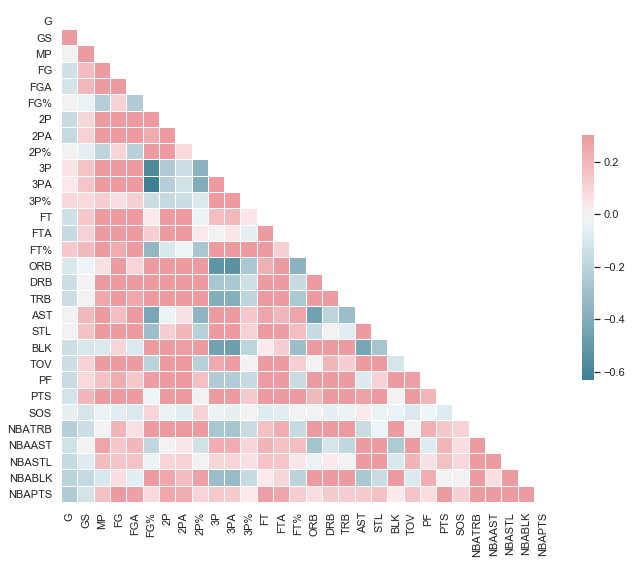

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

corr = df3.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

# Feature Selection

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 12)
reg = rfe.fit(X_train.values, y_train.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[ True False  True  True  True False False  True False  True  True False
 False False False False False False  True  True False  True False  True
  True]
[ 1  9  1  1  1 11  2  1  3  1  1  8 13  5  6 10 12  7  1  1  4  1 14  1
  1]


In [18]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,25):
    if reg.support_[x]:
        picks.append(cols[x])
X_train=X_train[picks]
X_test=X_test[picks]
X_train.head()

,G,MP,FG,FGA,2PA,3P,3PA,AST,STL,TOV,PTS,SOS
Name,,,,,,,,,,,,
Mike Higgins,-0.868495,-3.518929,-2.446230,-2.412762,-2.067621,-1.040380,-1.092230,-1.368845,-1.730732,-1.845803,-2.379129,-2.961529
Ashraf Amaya,0.993155,0.816330,0.686468,0.015798,1.019828,-1.171663,-1.193110,-1.101468,0.097978,-0.164353,0.539585,-1.329206
James Cotton,-1.990961,-2.603292,-2.669994,-2.583788,-2.067621,-1.302946,-1.344430,-1.235157,-0.917972,-1.565562,-2.455937,-3.316382
Eddie Robinson,0.609874,0.891076,-1.924113,-1.523431,-1.179451,-0.909097,-0.840031,0.770171,-0.511592,1.236855,-1.867074,-3.272332
Gilbert Arenas,-0.594723,0.498660,0.910232,0.939335,0.554595,0.666298,0.723604,-0.031960,1.723497,0.956613,0.846818,1.213498


# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression().fit(X_train.values, y_train.NBAPTS.values)

reg.score(X_train.values, y_train.NBAPTS.values)

0.2083221166921112

In [20]:
reg.coef_

array([-0.19819917, -0.2891116 ,  0.41235211, -2.69574956,  1.75083622,
       -0.13157801,  1.64326458,  0.23068681,  0.10437628, -0.1449507 ,
        0.5683159 ,  0.09428313])

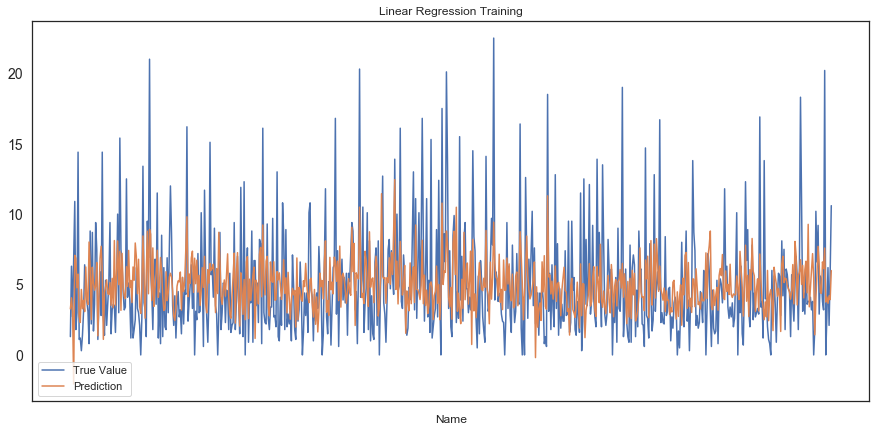

adj train r^2 = 0.19435133051608988
train mse = 11.404113834424267


In [21]:
y2_train = y_train.copy(deep=True)
y2_test = y_test.copy(deep=True)
y2_train['prediction'] = sc2.inverse_transform(reg.predict(X_train.values))
y2_test['prediction'] = sc2.inverse_transform(reg.predict(X_test.values))
y2_train['NBAPTS'] = sc2.inverse_transform(y2_train['NBAPTS'])
y2_test['NBAPTS'] = sc2.inverse_transform(y2_test['NBAPTS'])
y2_train['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
y2_train['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(y2_train.NBAPTS, y2_train.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse = ' + str(mean_squared_error(y2_train.NBAPTS, y2_train.prediction)))

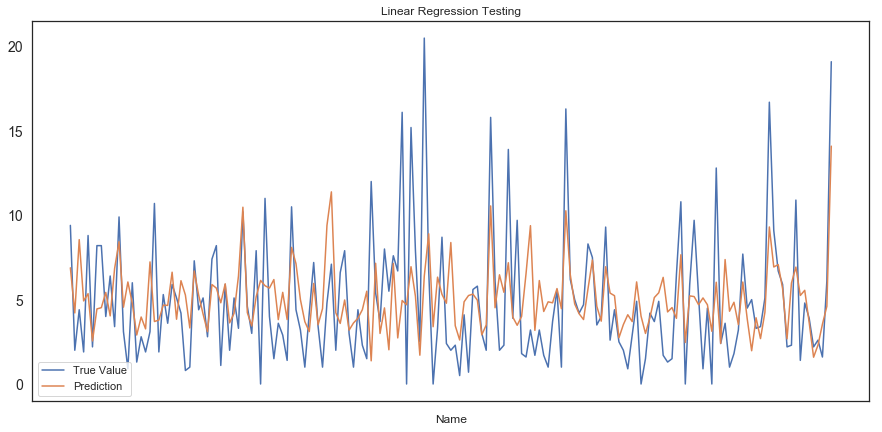

['G', 'MP', 'FG', 'FGA', '2PA', '3P', '3PA', 'AST', 'STL', 'TOV', 'PTS', 'SOS']
adj test r^2 = 0.24503800525010588
test mse = 10.964707233338116


In [22]:
y2_test['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
y2_test['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(X_train.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(y2_test.NBAPTS, y2_test.prediction)),X_train.shape[0], X_train.shape[1])))
print('test mse = ' + str(mean_squared_error(y2_test.NBAPTS, y2_test.prediction)))

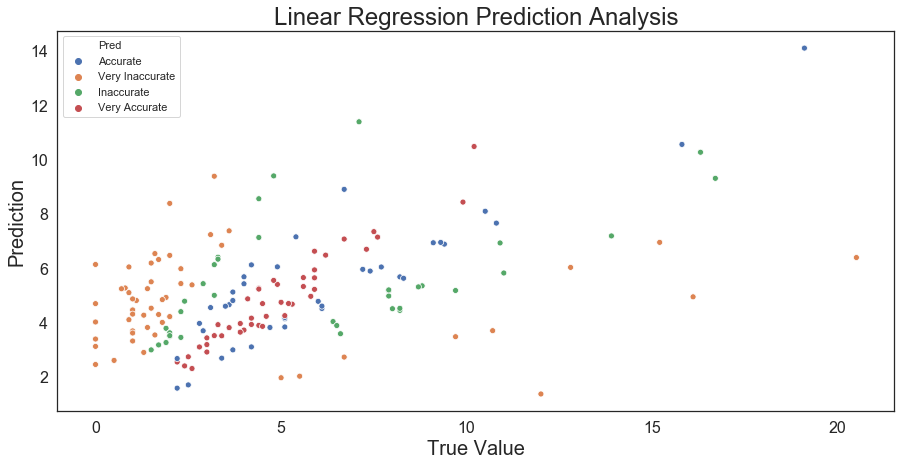

This model is able to relatively accurately predict 21.97% of NBA Rookies.
This model is able to very accurately predict 25.43% of NBA Rookies.


In [23]:
y2_test = y2_test[y2_test['prediction'] > 0]
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=y2_test)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Very Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


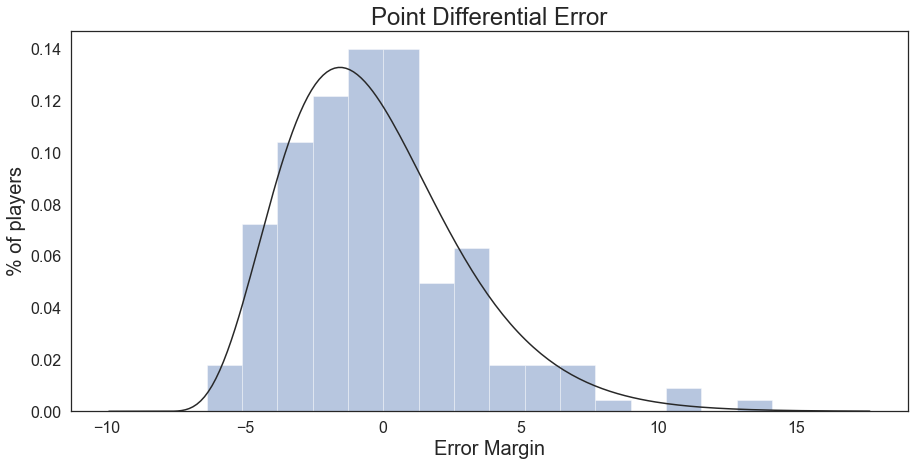

This model is able to relatively accurately predict 47.98% of NBA Rookies within 2 points.


In [24]:
from scipy import stats
y2_test['chip'] = (y2_test['NBAPTS'] - y2_test['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = y2_test['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[abs(y2_test['chip'])<=2])/len(y2_test),2)) + "% of NBA Rookies within 2 points.")

In [25]:
X_cross = X_train.append(X_test, ignore_index = True)
y_cross = y_train.append(y_test, ignore_index = True)
X_cross = X_cross.set_index(df3.index)
y_cross = y_cross.set_index(df3.index)
cvs = cross_val_score(reg, X_cross, y_cross.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 17.64


# Extra Trees

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(X_train.values, y_train.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

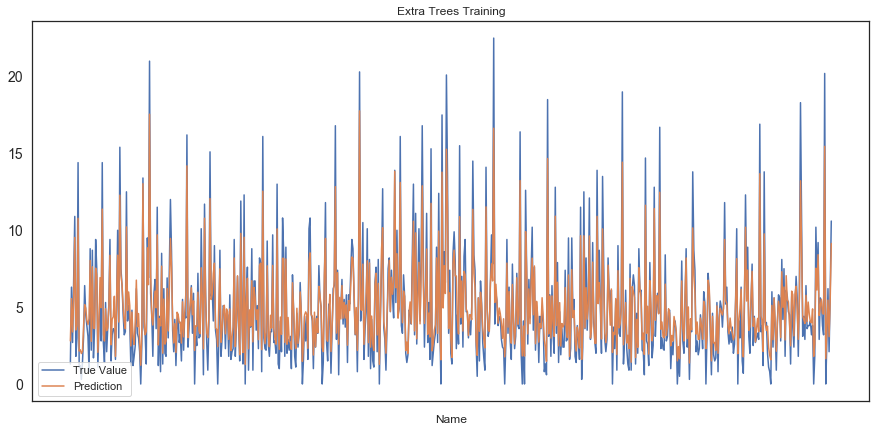

adj train r^2 = 0.8762460200255203
train mse = 1.7517616903607556


In [27]:
y2_train = y_train.copy(deep=True)
y2_test = y_test.copy(deep=True)
y2_train['prediction'] = sc2.inverse_transform(reg.predict(X_train.values))
y2_test['prediction'] = sc2.inverse_transform(reg.predict(X_test.values))
y2_train['NBAPTS'] = sc2.inverse_transform(y2_train['NBAPTS'])
y2_test['NBAPTS'] = sc2.inverse_transform(y2_test['NBAPTS'])
y2_train['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
y2_train['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(y2_train.NBAPTS, y2_train.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse = ' + str(mean_squared_error(y2_train.NBAPTS, y2_train.prediction)))

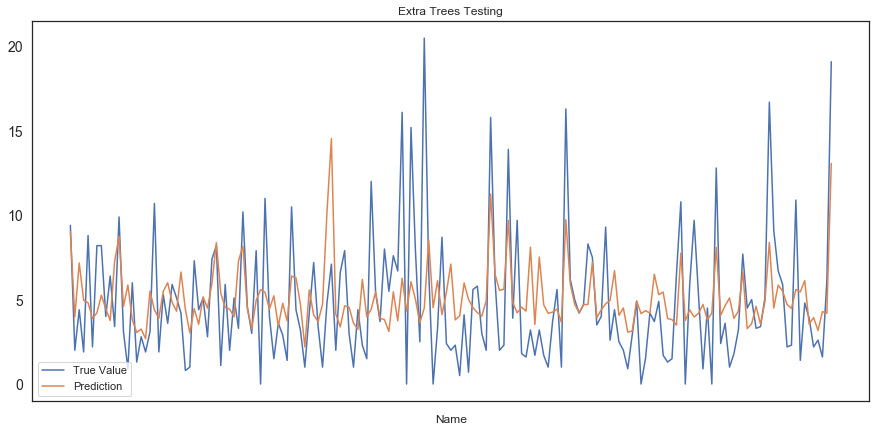

['G', 'MP', 'FG', 'FGA', '2PA', '3P', '3PA', 'AST', 'STL', 'TOV', 'PTS', 'SOS']
adj test r^2 = 0.22601513633217263
test mse = 11.240986290924855


In [28]:
y2_test['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
y2_test['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(X_train.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(y2_test.NBAPTS, y2_test.prediction)),X_train.shape[0], X_train.shape[1])))
print('test mse = ' + str(mean_squared_error(y2_test.NBAPTS, y2_test.prediction)))

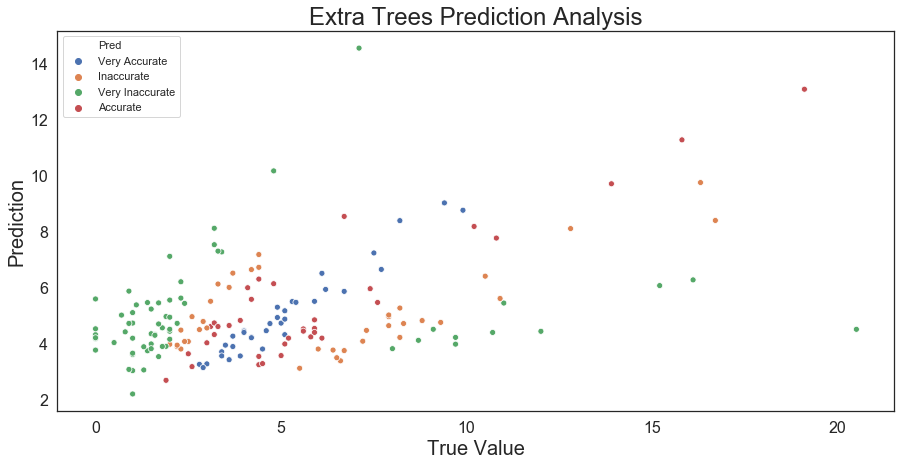

This model is able to relatively accurately predict 20.23% of NBA Rookies.
This model is able to very accurately predict 20.23% of NBA Rookies.


In [29]:
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=y2_test)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Very Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


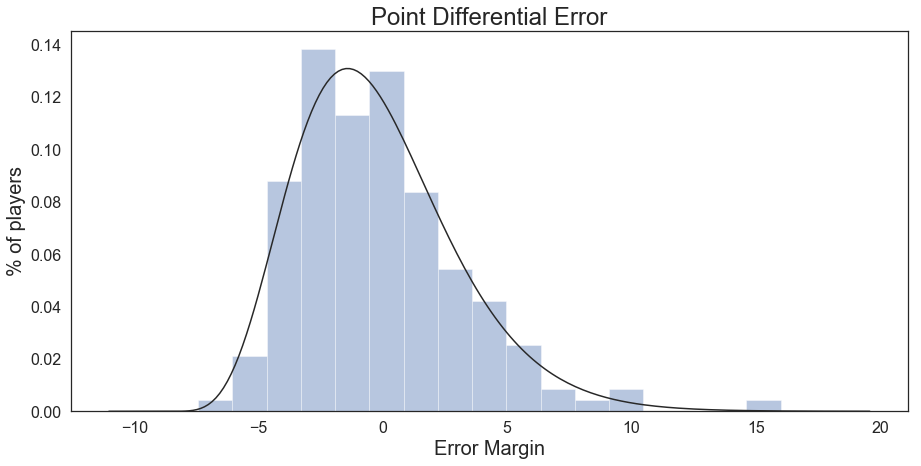

This model is able to relatively accurately predict 44.51% of NBA Rookies within 2 points.


In [30]:
y2_test['chip'] = (y2_test['NBAPTS'] - y2_test['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = y2_test['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[abs(y2_test['chip'])<=2])/len(y2_test),2)) + "% of NBA Rookies within 2 points.")

In [31]:
cvs = cross_val_score(reg, X_cross, y_cross.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 14.08


# Cross Validated Extra Trees

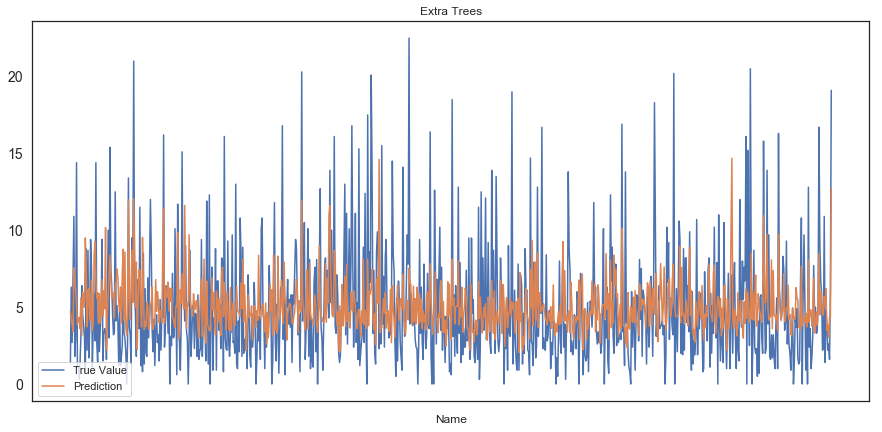

adj overall r^2 = 0.1314607138402879
overall mse = 12.35972439996536


In [32]:
from sklearn.model_selection import cross_val_predict
y2_train = y_cross.copy(deep=True)
y2_train['prediction'] = sc2.inverse_transform(cross_val_predict(reg, X_cross, y_cross.NBAPTS, cv=5))
y2_train['NBAPTS'] = sc2.inverse_transform(y2_train['NBAPTS'])
y2_train['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees', fontsize=14, label='True Value')
y2_train['prediction'].plot(figsize=(15,7), title= 'Extra Trees', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj overall r^2 = ' + str(adj_r2_score((r2_score(y2_train.NBAPTS, y2_train.prediction)),X_train.shape[0], X_train.shape[1])))
print('overall mse = ' + str(mean_squared_error(y2_train.NBAPTS, y2_train.prediction)))

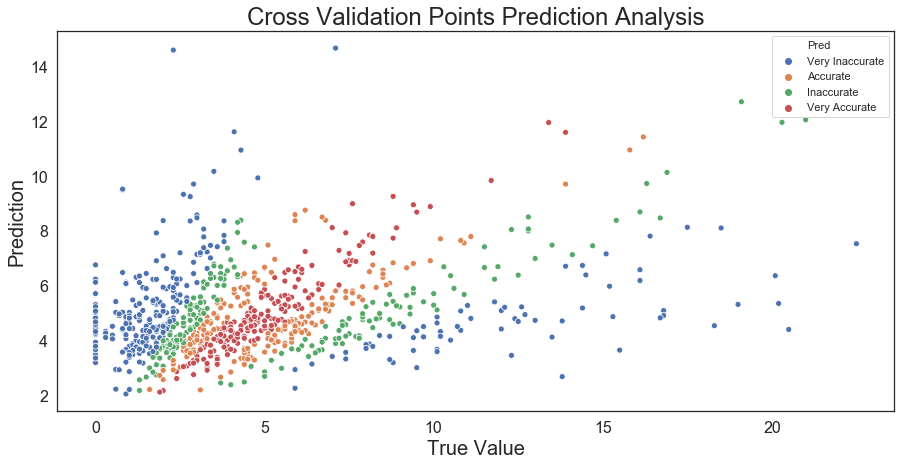

This model is able to relatively accurately predict 22.06% of NBA Rookies.
This model is able to very accurately predict 21.48% of NBA Rookies.
adj overall r^2 = 0.1314607138402879
overall mse = 12.35972439996536


In [33]:
y2_train.loc[y2_train[['prediction','NBAPTS']].max(axis=1)/y2_train[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
y2_train.loc[y2_train[['prediction','NBAPTS']].max(axis=1)/y2_train[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
y2_train.loc[y2_train[['prediction','NBAPTS']].max(axis=1)/y2_train[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
y2_train.loc[y2_train[['prediction','NBAPTS']].max(axis=1)/y2_train[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=y2_train)
ax.set_title("Cross Validation Points Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_train[y2_train['Pred'] == 'Accurate'])/len(y2_train),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(y2_train[y2_train['Pred'] == 'Very Accurate'])/len(y2_train),2)) + "% of NBA Rookies.")
print('adj overall r^2 = ' + str(adj_r2_score((r2_score(y2_train.NBAPTS, y2_train.prediction)),X_train.shape[0], X_train.shape[1])))
print('overall mse = ' + str(mean_squared_error(y2_train.NBAPTS, y2_train.prediction)))

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


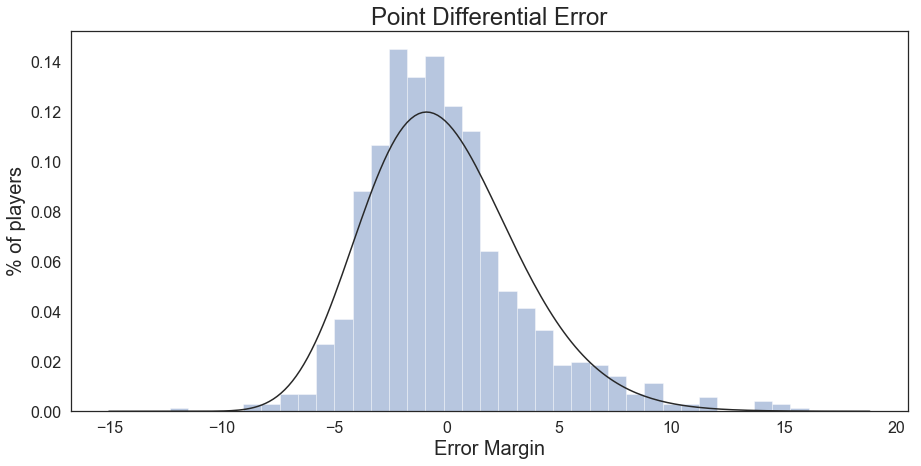

This model is able to relatively accurately predict 48.5% of NBA Rookies within 2 points.


In [34]:
y2_train['chip'] = (y2_train['NBAPTS'] - y2_train['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = y2_train['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_train[abs(y2_train['chip'])<=2])/len(y2_train),2)) + "% of NBA Rookies within 2 points.")

# Grid Search on Extra Trees Regressor

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': np.arange(2,28,2),
              'min_samples_split': np.arange(2,11),
              'bootstrap': [True, False],
              'n_estimators': [200,800]}

grid = RandomizedSearchCV(ExtraTreesRegressor(), param_grid, n_iter=10, cv=5)

In [36]:
grid.fit(X_cross, y_cross);
grid.best_params_

{'n_estimators': 800,
 'min_samples_split': 7,
 'max_depth': 26,
 'bootstrap': True}

In [37]:
reg = ExtraTreesRegressor(min_samples_split=10, n_estimators=200, max_depth=26, bootstrap=True)
reg.fit(X_train.values, y_train.NBAPTS.values)
cvs = cross_val_score(reg, X_cross, y_cross.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 14.63


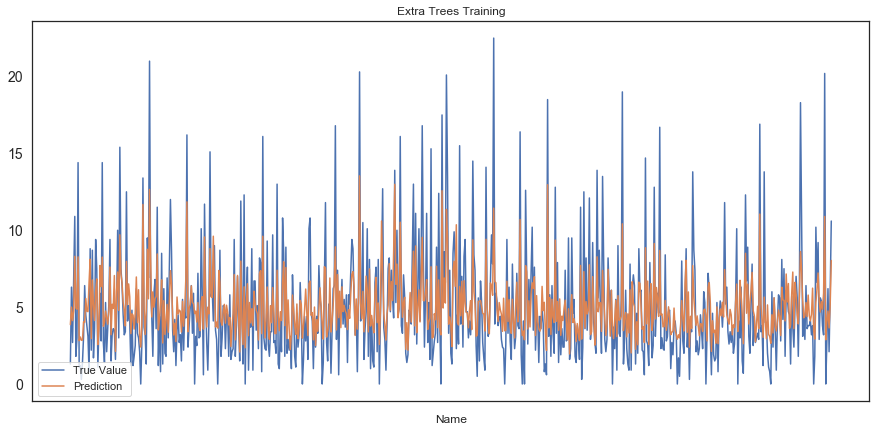

adj train r^2 = 0.5820892516512126
train mse = 5.915608040229234


In [38]:
y2_train = y_train.copy(deep=True)
y2_test = y_test.copy(deep=True)
y2_train['prediction'] = sc2.inverse_transform(reg.predict(X_train.values))
y2_test['prediction'] = sc2.inverse_transform(reg.predict(X_test.values))
y2_train['NBAPTS'] = sc2.inverse_transform(y2_train['NBAPTS'])
y2_test['NBAPTS'] = sc2.inverse_transform(y2_test['NBAPTS'])
y2_train['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
y2_train['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(y2_train.NBAPTS, y2_train.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse = ' + str(mean_squared_error(y2_train.NBAPTS, y2_train.prediction)))

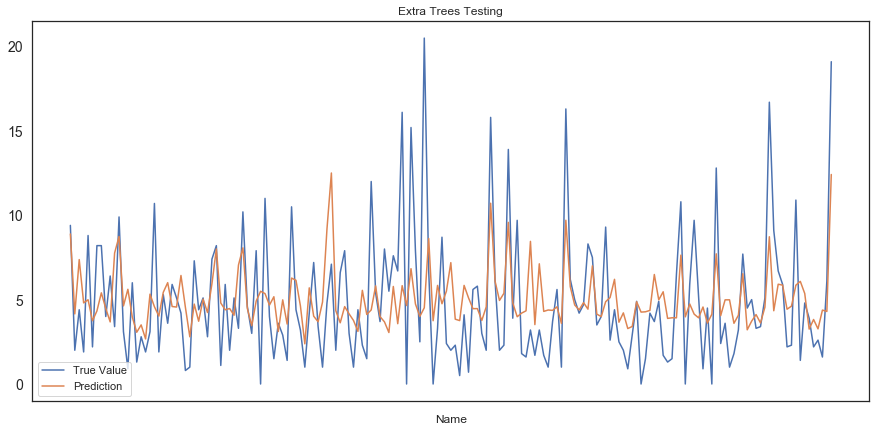

adj test r^2 = 0.24983399405549855
test mse = 10.895052583817753


In [39]:
y2_test['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
y2_test['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(y2_test.NBAPTS, y2_test.prediction)),X_train.shape[0], X_train.shape[1])))
print('test mse = ' + str(mean_squared_error(y2_test.NBAPTS, y2_test.prediction)))

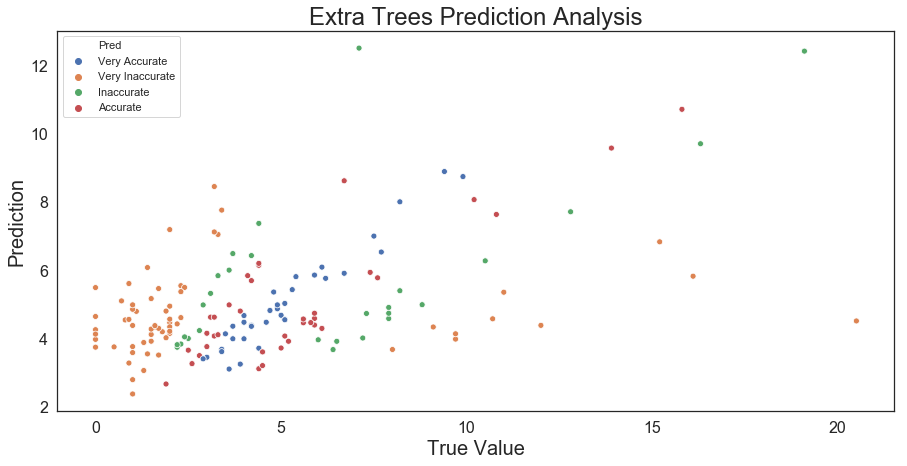

This model is able to relatively accurately predict 20.81% of NBA Rookies.
This model is able to very accurately predict 20.23% of NBA Rookies.


In [40]:
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=y2_test)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Very Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(X_train.values, y_train.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

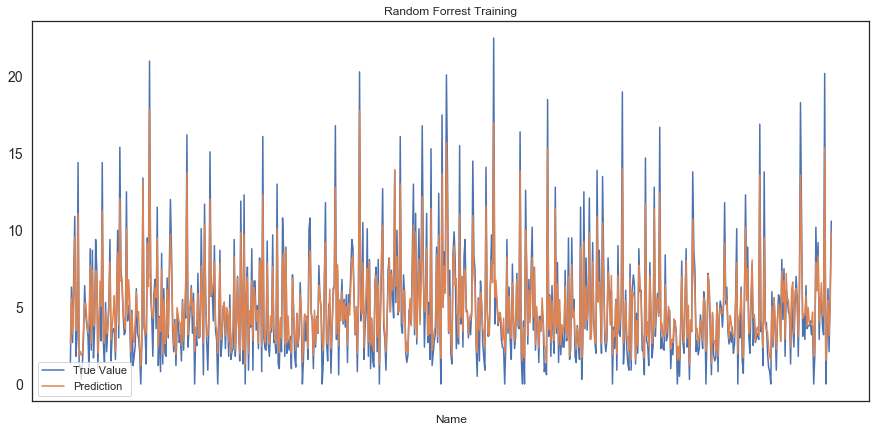

adj train r^2 = 0.8763054194007579
train mse = 1.7509208806349261


In [42]:
y2_train = y_train.copy(deep=True)
y2_test = y_test.copy(deep=True)
y2_train['prediction'] = sc2.inverse_transform(reg.predict(X_train.values))
y2_test['prediction'] = sc2.inverse_transform(reg.predict(X_test.values))
y2_train['NBAPTS'] = sc2.inverse_transform(y2_train['NBAPTS'])
y2_test['NBAPTS'] = sc2.inverse_transform(y2_test['NBAPTS'])
y2_train['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
y2_train['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(y2_train.NBAPTS, y2_train.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse = ' + str(mean_squared_error(y2_train.NBAPTS, y2_train.prediction)))

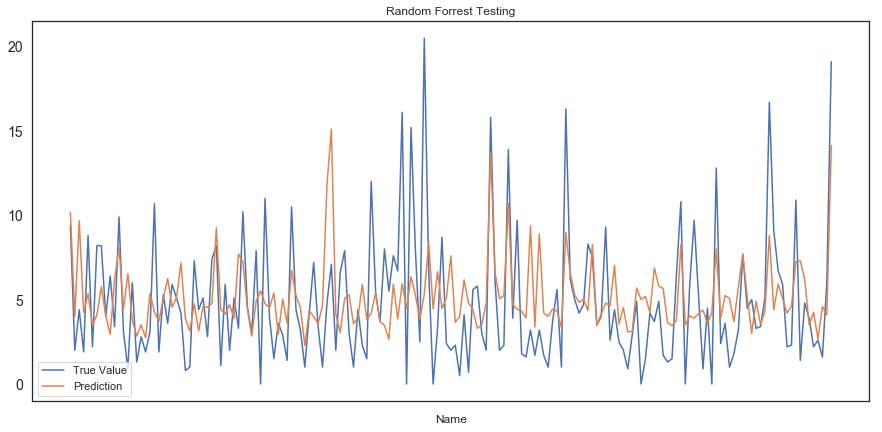

adj test r^2 = 0.2077262393776752
test mse = 11.506605490462423


In [43]:
y2_test['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
y2_test['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(y2_test.NBAPTS, y2_test.prediction)),X_train.shape[0], X_train.shape[1])))
print('test mse = ' + str(mean_squared_error(y2_test.NBAPTS, y2_test.prediction)))

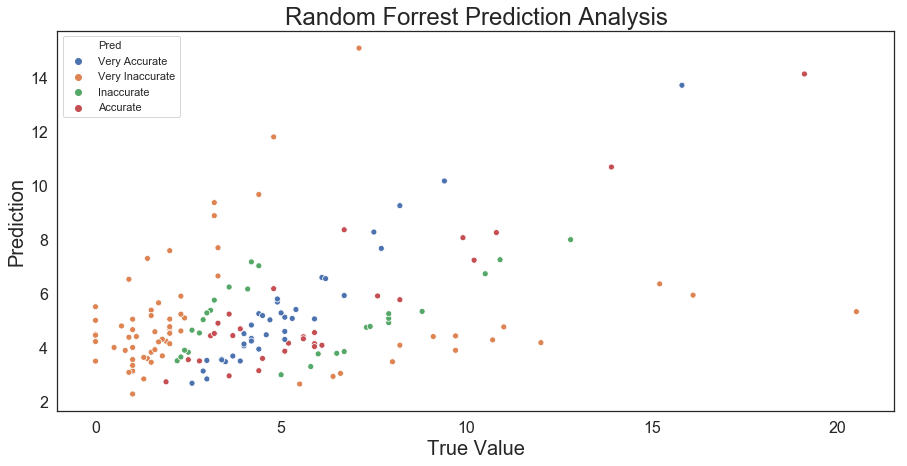

This model is able to relatively accurately predict 16.76% of NBA Rookies.
This model is able to very accurately predict 21.39% of NBA Rookies.


In [44]:
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=y2_test)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Very Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


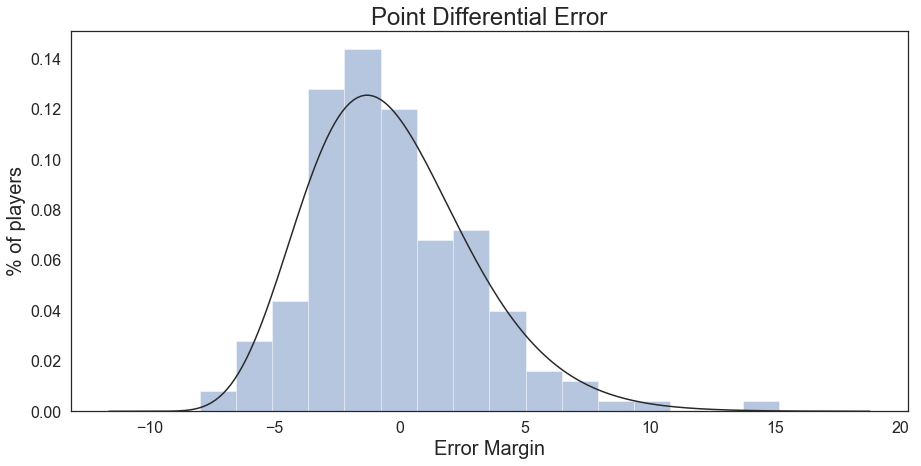

This model is able to relatively accurately predict 41.62% of NBA Rookies within 2 points.


In [45]:
y2_test['chip'] = (y2_test['NBAPTS'] - y2_test['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = y2_test['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[abs(y2_test['chip'])<=2])/len(y2_test),2)) + "% of NBA Rookies within 2 points.")

In [46]:
cvs = cross_val_score(reg, X_cross, y_cross.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 12.37


In [47]:
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators=1000, max_depth=16, reg_lambda=.48, gamma=.3, booster='gblinear')
reg.fit(X_train.values, y_train.NBAPTS.values)

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost-1.0.0_snapshot-py3.7.egg\xgboost\core.py:611: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.3,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=16, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=0.48, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

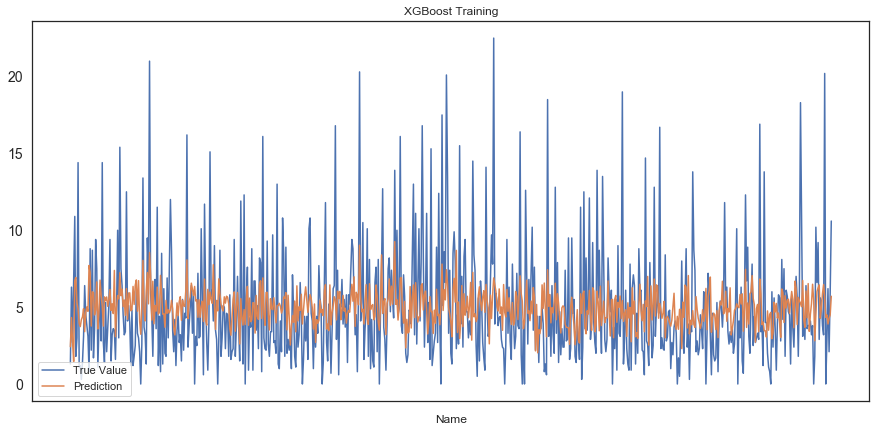

adj train r^2 = 0.1364202588594745
train mse = 12.224139437079874


In [48]:
y2_train = y_train.copy(deep=True)
y2_test = y_test.copy(deep=True)
y2_train['prediction'] = sc2.inverse_transform(reg.predict(X_train.values))
y2_test['prediction'] = sc2.inverse_transform(reg.predict(X_test.values))
y2_train['NBAPTS'] = sc2.inverse_transform(y2_train['NBAPTS'])
y2_test['NBAPTS'] = sc2.inverse_transform(y2_test['NBAPTS'])
y2_train['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
y2_train['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(y2_train.NBAPTS, y2_train.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse = ' + str(mean_squared_error(y2_train.NBAPTS, y2_train.prediction)))

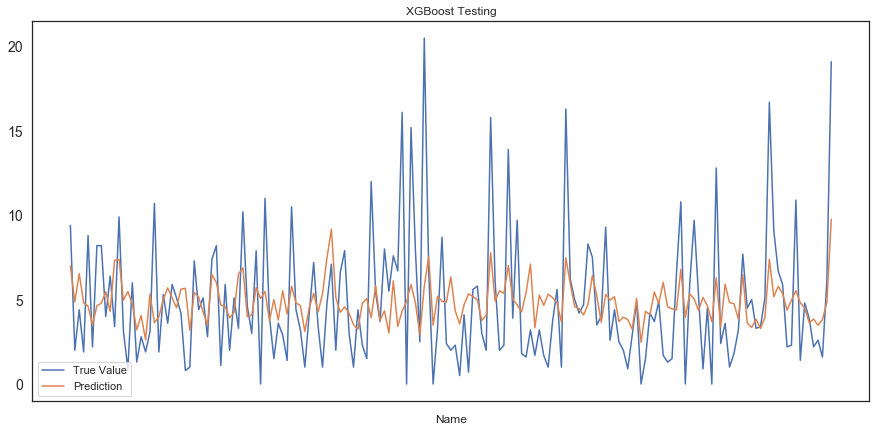

adj test r^2 = 0.20221838975820705
test mse = 11.58659886626504


In [49]:
y2_test['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
y2_test['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(y2_test.NBAPTS, y2_test.prediction)),X_train.shape[0], X_train.shape[1])))
print('test mse = ' + str(mean_squared_error(y2_test.NBAPTS, y2_test.prediction)))

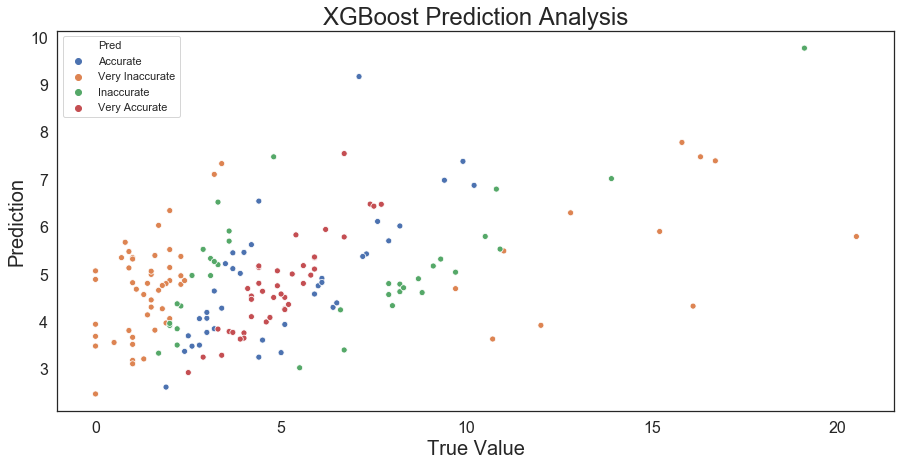

This model is able to relatively accurately predict 21.97% of NBA Rookies.
This model is able to very accurately predict 23.7% of NBA Rookies.


In [50]:
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=y2_test)
ax.set_title("XGBoost Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Very Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


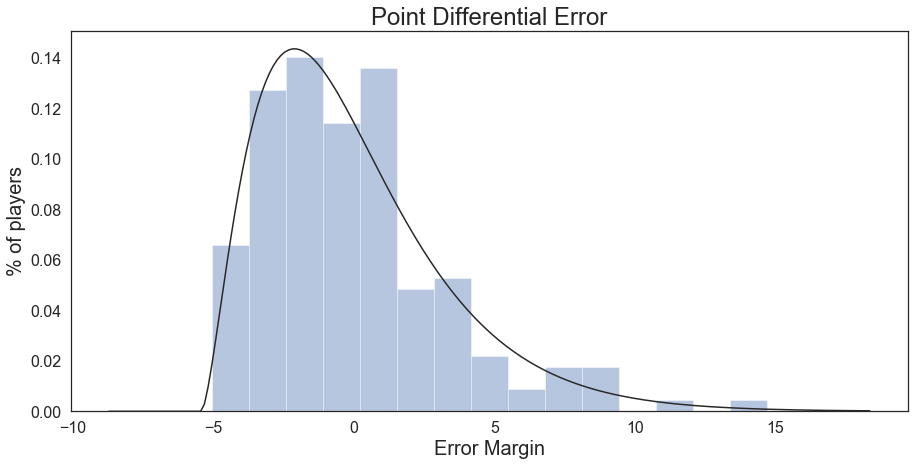

This model is able to relatively accurately predict 45.09% of NBA Rookies within 2 points.


In [51]:
y2_test['chip'] = (y2_test['NBAPTS'] - y2_test['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = y2_test['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[abs(y2_test['chip'])<=2])/len(y2_test),2)) + "% of NBA Rookies within 2 points.")

In [52]:
cvs = cross_val_score(reg, X_cross, y_cross.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 13.88


# Feed Forward Neural Network

In [53]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [54]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=12, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(X_train.values, y_train.NBAPTS.values, validation_data=[X_test.values, y_test['NBAPTS'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


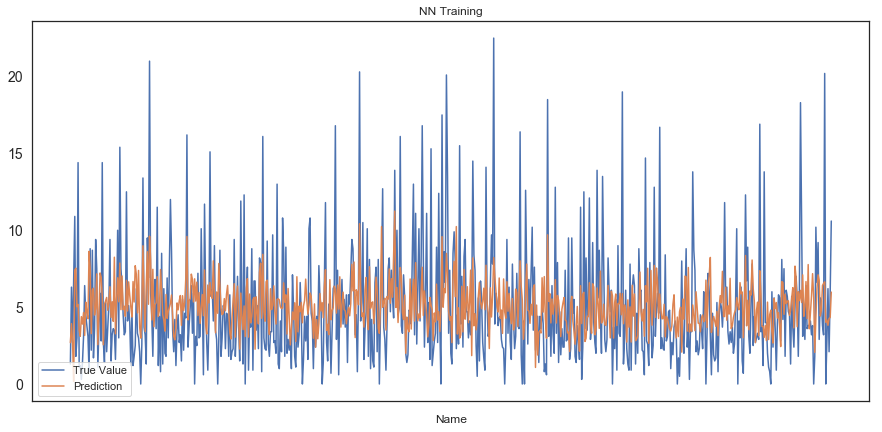

adj train r^2 = 0.17896088981650982
train mse = 11.621968520155207


In [55]:
y2_train = y_train.copy(deep=True)
y2_test = y_test.copy(deep=True)
y2_train['prediction'] = sc2.inverse_transform(model.predict(X_train.values))
y2_test['prediction'] = sc2.inverse_transform(model.predict(X_test.values))
y2_train['NBAPTS'] = sc2.inverse_transform(y2_train['NBAPTS'])
y2_test['NBAPTS'] = sc2.inverse_transform(y2_test['NBAPTS'])
y2_train['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
y2_train['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(y2_train.NBAPTS, y2_train.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse = ' + str(mean_squared_error(y2_train.NBAPTS, y2_train.prediction)))

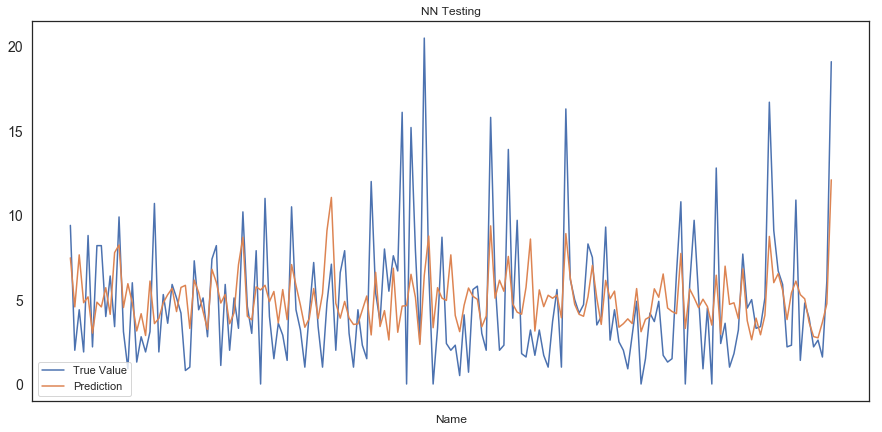

adj test r^2 = 0.24470489269484286
test mse = 10.969545200904175


In [56]:
y2_test['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
y2_test['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(y2_test.NBAPTS, y2_test.prediction)),X_train.shape[0], X_train.shape[1])))
print('test mse = ' + str(mean_squared_error(y2_test.NBAPTS, y2_test.prediction)))

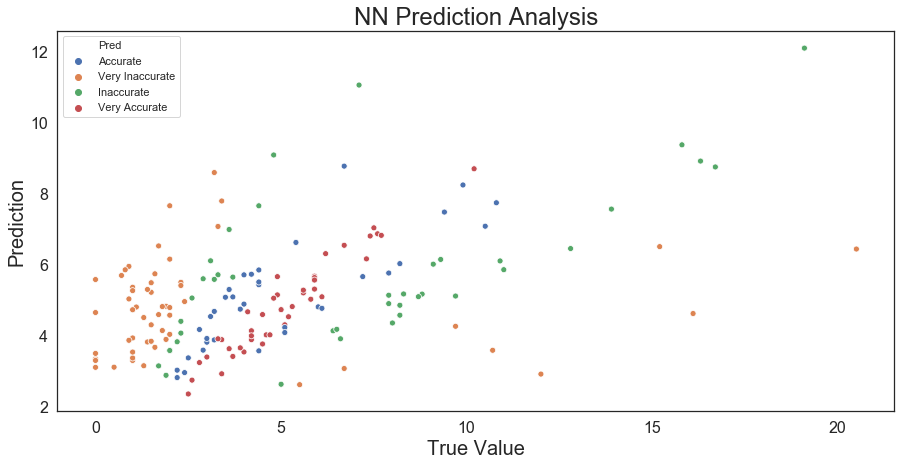

This model is able to relatively accurately predict 20.23% of NBA Rookies.
This model is able to very accurately predict 24.86% of NBA Rookies.


In [57]:
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=y2_test)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Very Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


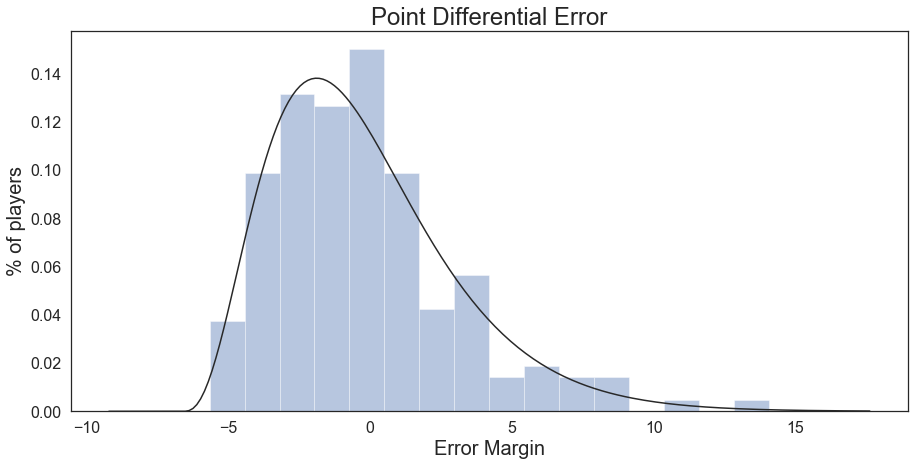

This model is able to relatively accurately predict 47.4% of NBA Rookies within 2 points.


In [58]:
y2_test['chip'] = (y2_test['NBAPTS'] - y2_test['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = y2_test['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[abs(y2_test['chip'])<=2])/len(y2_test),2)) + "% of NBA Rookies within 2 points.")

In [59]:
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [60]:
from sklearn.model_selection import KFold
X = X_cross.values
y = y_cross.NBAPTS.values
seed = 10
np.random.seed(seed)
kfold = KFold(n_splits=5, shuffle=False, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y):
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
    #model.add(Dropout(0.2))
    model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=[r2_keras])
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=False)
    out = model.fit(X[train], y[train], validation_data=[X[test], y[test]], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    scores = model.evaluate(X[test], y[test], verbose=0)
    cvscores.append(scores[1])
print('The Cross Validation Score is ' + str(round(100*np.mean(cvscores),2)))

The Cross Validation Score is 13.82


# LSTM

In [61]:
X_tr_t = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

In [62]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(1, X_train.values.shape[1]), recurrent_activation='linear', recurrent_regularizer=regularizers.l2(0.32),kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(50, activation='linear'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, y_train.NBAPTS.values.ravel(), validation_data=[X_tst_t, y_test['NBAPTS'].values.ravel()], epochs=50, verbose=0, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


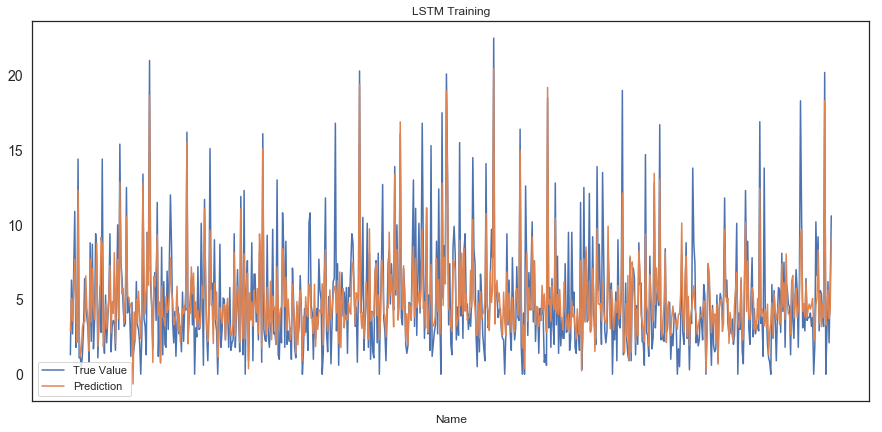

adj train r^2 = 0.6652720688928433
train mse = 4.738139060482337


In [63]:
y2_train = y_train.copy(deep=True)
y2_test = y_test.copy(deep=True)
y2_train['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
y2_test['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
y2_train['NBAPTS'] = sc2.inverse_transform(y2_train['NBAPTS'])
y2_test['NBAPTS'] = sc2.inverse_transform(y2_test['NBAPTS'])
y2_train['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
y2_train['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(y2_train.NBAPTS, y2_train.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse = ' + str(mean_squared_error(y2_train.NBAPTS, y2_train.prediction)))

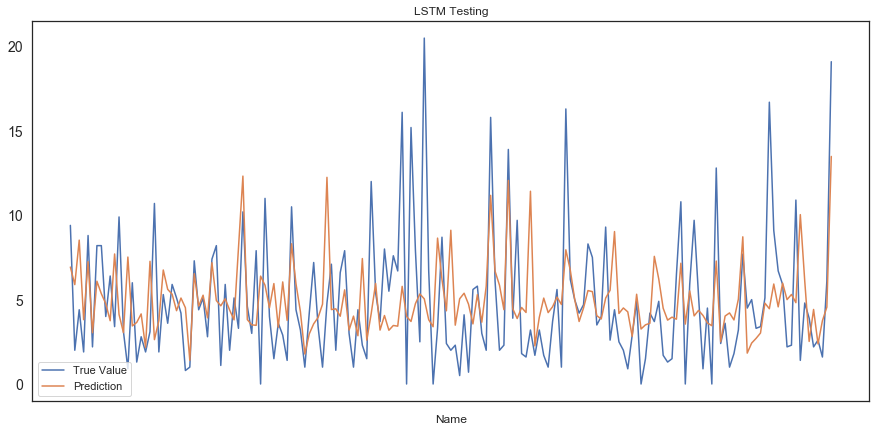

adj test r^2 = 0.0814126817519234
test mse = 13.341123239169198


In [64]:
y2_test['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
y2_test['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(y2_test.NBAPTS, y2_test.prediction)),X_train.shape[0], X_train.shape[1])))
print('test mse = ' + str(mean_squared_error(y2_test.NBAPTS, y2_test.prediction)))

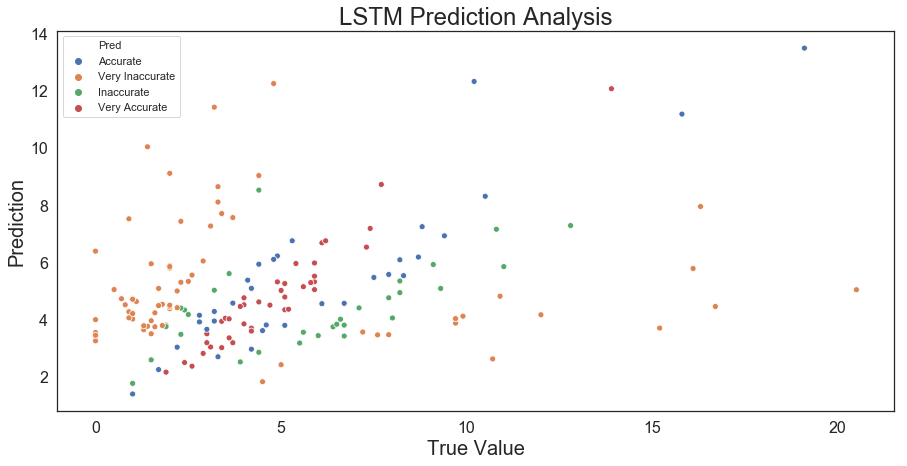

This model is able to relatively accurately predict 19.08% of NBA Rookies.
This model is able to very accurately predict 23.12% of NBA Rookies.


In [65]:
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=y2_test)
ax.set_title("LSTM Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Very Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


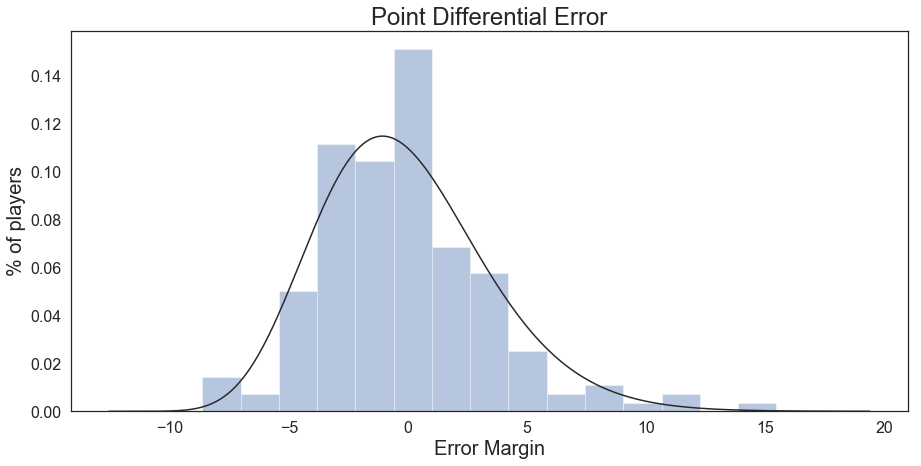

This model is able to relatively accurately predict 42.2% of NBA Rookies within 2 points.


In [66]:
y2_test['chip'] = (y2_test['NBAPTS'] - y2_test['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = y2_test['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[abs(y2_test['chip'])<=2])/len(y2_test),2)) + "% of NBA Rookies within 2 points.")

In [67]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

In [68]:
tpot = TPOTRegressor(population_size=5, max_time_mins=.5, verbosity=1, config_dict='TPOT light')
tpot.fit(X_train.values, y_train.NBAPTS.values.ravel())


2.002581483333333 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(LassoLarsCV(PCA(input_matrix, iterated_power=9, svd_solver=randomized), normalize=True), l1_ratio=1.0, tol=0.1)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0, template=None,
       use_dask=False, verbosity=1, warm_start=False)

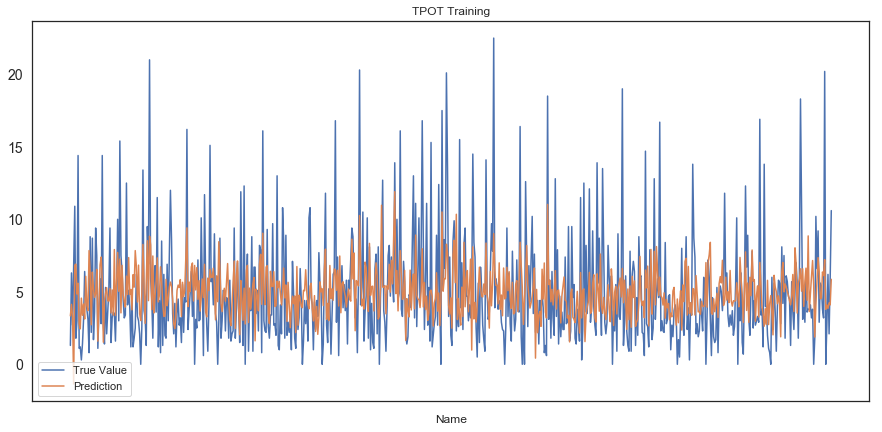

adj train r^2 = 0.192486579150275
train mse = 11.430509753208907


In [69]:
y2_train = y_train.copy(deep=True)
y2_test = y_test.copy(deep=True)
y2_train['prediction'] = sc2.inverse_transform(tpot.predict(X_train.values))
y2_test['prediction'] = sc2.inverse_transform(tpot.predict(X_test.values))
y2_train['NBAPTS'] = sc2.inverse_transform(y2_train['NBAPTS'])
y2_test['NBAPTS'] = sc2.inverse_transform(y2_test['NBAPTS'])
y2_train['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
y2_train['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(y2_train.NBAPTS, y2_train.prediction)),X_train.shape[0], X_train.shape[1])))
print('train mse = ' + str(mean_squared_error(y2_train.NBAPTS, y2_train.prediction)))

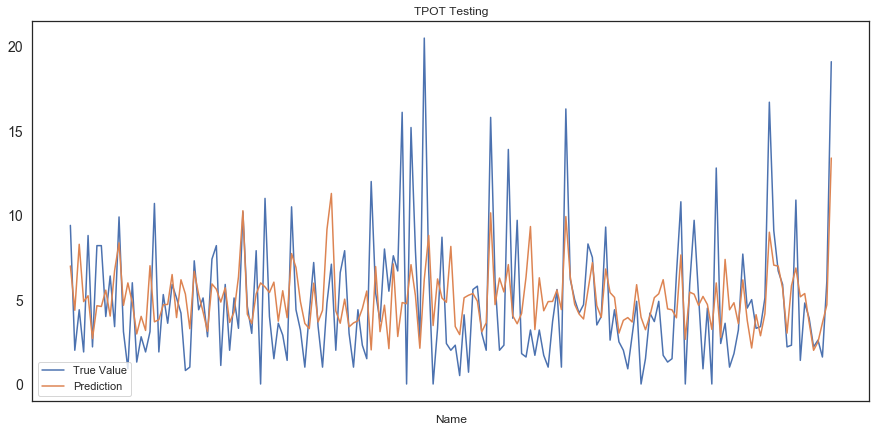

adj test r^2 = 0.24638148924810355
test mse = 10.945195113770296


In [70]:
y2_test['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
y2_test['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(y2_test.NBAPTS, y2_test.prediction)),X_train.shape[0], X_train.shape[1])))
print('test mse = ' + str(mean_squared_error(y2_test.NBAPTS, y2_test.prediction)))

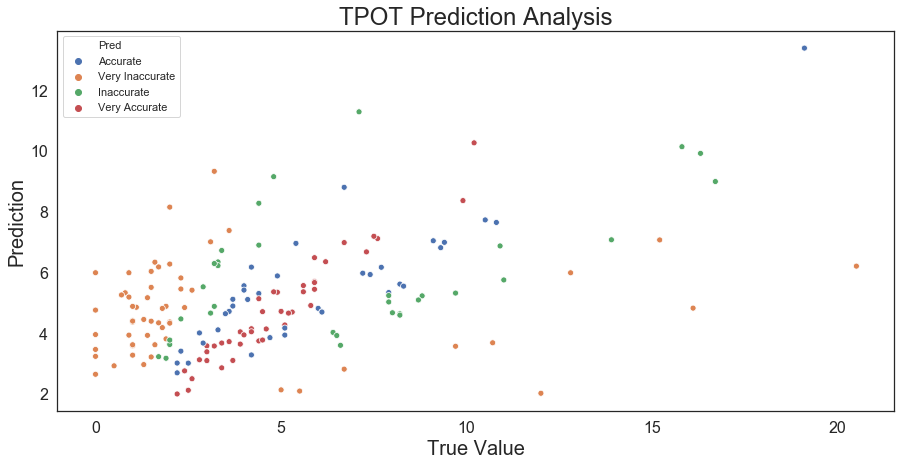

This model is able to relatively accurately predict 21.97% of NBA Rookies.
This model is able to very accurately predict 25.43% of NBA Rookies.


In [71]:
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
y2_test.loc[y2_test[['prediction','NBAPTS']].max(axis=1)/y2_test[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=y2_test)
ax.set_title("TPOT Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(y2_test[y2_test['Pred'] == 'Very Accurate'])/len(y2_test),2)) + "% of NBA Rookies.")

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


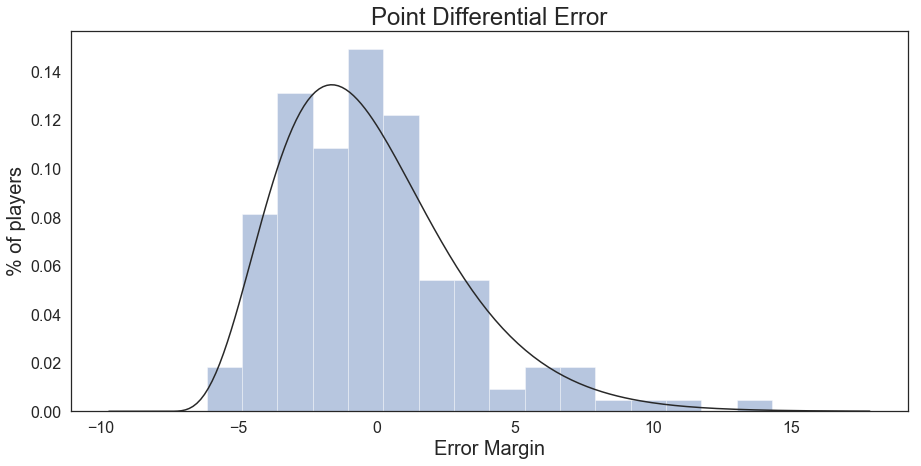

This model is able to relatively accurately predict 47.4% of NBA Rookies within 2 points.


In [72]:
y2_test['chip'] = (y2_test['NBAPTS'] - y2_test['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = y2_test['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(y2_test[abs(y2_test['chip'])<=2])/len(y2_test),2)) + "% of NBA Rookies within 2 points.")

In [73]:
cvs = cross_val_score(tpot, X_cross, y_cross.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))


2.0003001333333335 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: RidgeCV(LinearSVR(CombineDFs(input_matrix, LinearSVR(Nystroem(CombineDFs(input_matrix, input_matrix), gamma=0.75, kernel=cosine, n_components=2), C=25.0, dual=True, epsilon=1.0, loss=squared_epsilon_insensitive, tol=0.0001)), C=25.0, dual=True, epsilon=1.0, loss=squared_epsilon_insensitive, tol=1e-05))


C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)



2.0005962999999998 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: LinearSVR(DecisionTreeRegressor(input_matrix, max_depth=1, min_samples_leaf=17, min_samples_split=20), C=0.1, dual=True, epsilon=0.0001, loss=squared_epsilon_insensitive, tol=0.1)

2.0006978666666666 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: LassoLarsCV(SelectPercentile(MinMaxScaler(PCA(input_matrix, iterated_power=9, svd_solver=randomized)), percentile=66), normalize=False)

2.0126146333333335 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(SelectPercentile(PCA(PCA(input_matrix, iterated_power=1, svd_solver=randomized), iterated_power=10

# Differences

In [74]:
y2_test['chip'] = y2_test['NBAPTS'] - y2_test['prediction']
y2_test.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Justin Patton,-1.142277,-0.809825,1.582914,-0.755875,2.0,8.152813,Very Inaccurate,-6.152813
Derrick White,-0.291927,-0.407979,-0.550060,-0.065652,3.2,9.332407,Very Inaccurate,-6.132407
Chris Boucher,-0.575377,-0.809825,-1.083304,-0.755875,0.0,5.991546,Very Inaccurate,-5.991546
Georges Niang,-0.745447,-0.649087,-0.816682,-0.755875,0.9,5.990987,Very Inaccurate,-5.090987
Tyler Lydon,-1.142277,-0.809825,-1.083304,-0.755875,0.0,4.760611,Very Inaccurate,-4.760611


In [75]:
y2_test['chip'] = y2_test['NBAPTS'] - y2_test['prediction']
y2_test.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Donovan Mitchell,0.955252,2.163840,2.916023,0.279460,20.5,6.208684,Very Inaccurate,14.291316
Kyle Kuzma,2.429191,0.636823,0.516427,0.624571,16.1,4.825498,Very Inaccurate,11.274502
Andre Ingram,0.558422,2.003102,2.916023,4.420800,12.0,2.021303,Very Inaccurate,9.978697
Lauri Markkanen,3.109470,0.154607,0.516427,1.314795,15.2,7.071734,Very Inaccurate,8.128266
Collin Sexton,0.501732,1.601255,0.249805,-0.410764,16.7,8.995501,Inaccurate,7.704499


# 2019 Predictions

In [76]:
train=df3
test=df4
trains = np.split(train, [37], axis=1)
X_train=trains[0]
Y_train=trains[1]
tests = np.split(test, [37], axis=1)
X_test=tests[0]
y_test=tests[1]

In [77]:
train.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.868495,-1.942153,-3.518929,-2.446230,-2.412762,-0.150354,-1.927948,-2.067621,-0.045807,-1.040380,...,-0.725978,-1.845803,-2.386757,-2.379129,-2.961529,-0.915517,-0.568717,-0.550060,-0.065652,-0.781639
Ashraf Amaya,0.993155,1.517915,0.816330,0.686468,0.015798,1.633683,1.408351,1.019828,1.286821,-1.171663,...,0.735793,-0.164353,2.224214,0.539585,-1.329206,2.032361,-0.327609,-0.016816,-0.065652,0.495541
James Cotton,-1.990961,-1.912831,-2.603292,-2.669994,-2.583788,-0.548731,-2.005536,-2.067621,-0.815352,-1.302946,...,-0.579801,-1.565562,0.419921,-2.455937,-3.316382,-0.745447,-0.809825,-0.816682,-0.410764,-0.424029
Eddie Robinson,0.609874,0.198397,0.891076,-1.924113,-1.523431,-1.865107,-1.462418,-1.179451,-2.054133,-0.909097,...,-0.725978,1.236855,-1.584849,-1.867074,-3.272332,0.388352,-0.407979,0.783049,0.624571,0.674346
Gilbert Arenas,-0.594723,-1.033152,0.498660,0.910232,0.939335,-0.115712,0.554879,0.554595,0.198196,0.666298,...,-0.725978,0.956613,0.419921,0.846818,1.213498,0.445042,2.163840,2.916023,-0.065652,1.670546


In [82]:
tests[0]

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Nickeil Alexander-Walker,-0.676855,-0.036183,0.386542,0.238940,0.255233,-0.150354,-0.298593,-0.418162,0.310812,0.928863,...,-0.287447,0.256009,-0.582464,0.257955,0.263961,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Al-Wajid Aminu,-1.580303,-1.238411,-0.342230,-0.581529,-0.907739,1.200664,0.011761,-0.291281,1.230513,-1.040380,...,0.589616,0.115888,2.825644,-0.868566,-1.914102,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Desmond Bane,0.472988,0.403656,0.162304,-0.134000,-0.394663,0.750325,-0.453769,-0.756513,1.230513,0.535015,...,-0.579801,-1.005078,0.018967,-0.254100,0.956536,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
RJ Barrett,-1.470794,-0.886539,1.395611,2.998697,3.128459,-0.323561,2.416999,2.373230,0.310812,1.191429,...,-0.433624,1.657217,-0.782941,2.587805,1.419068,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Charles Bassey,-1.580303,-1.003830,0.666839,0.835644,-0.189433,2.672927,1.485939,0.681477,2.375447,-0.909097,...,2.489919,1.236855,0.820875,0.539585,-1.275367,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Tyus Battle,0.308725,0.755527,1.414297,0.686468,1.178770,-0.964429,0.166937,0.427714,-0.721505,0.928863,...,-0.725978,-0.304474,-0.381987,0.898024,0.819489,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Phil Bledsoe,-1.552926,-2.000799,-3.836599,-2.520818,-2.378557,-0.877825,-2.083124,-2.152209,-0.759044,-0.909097,...,-1.018333,-2.546407,-2.587234,-2.481540,-1.586169,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Bol Bol,-2.264733,-1.736895,0.367855,2.849521,1.828666,1.529758,2.649764,2.246348,1.080358,0.535015,...,2.928450,-0.024232,-0.983418,2.178161,-0.010133,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706
Marques Bolden,-0.101933,-1.297056,-2.659352,-2.147877,-2.310147,1.737607,-1.462418,-1.729271,1.474515,-1.302946,...,0.589616,-1.985924,-1.183895,-2.225512,1.147422,-1.142277,-0.809825,-1.083304,-0.755875,-1.113706


In [79]:
from sklearn.feature_selection import RFE
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
y2_test = y_test.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 30)
    reg = rfe.fit(X_train.values, y_train[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,37):
        if reg.support_[x]:
            picks.append(cols[x])
    X3_train = X_train[picks]
    X3_test = X_test[picks]
    K.clear_session()
    model = RandomForestRegressor(n_estimators=1000, max_depth=5, min_samples_split=14).fit(X3_train.values, y_train[col].values.ravel())
    y2_test[col] = scalar.inverse_transform(model.predict(X3_test.values))

ValueError: Found input variables with inconsistent numbers of samples: [866, 693]

In [ ]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

In [ ]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("Train Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model should be able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model should be able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")

# Results

In [ ]:
test_y2 = test_y2.loc[~test_y2.index.duplicated(keep='first')]
test_y2['NBABLK'] = test_y2['NBABLK'].abs()

In [ ]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

In [ ]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')
## This is the result of Neural Networks